# Исследование популярности компьютерных игр

## Содержание
1. [Описание проекта](#id_description)
2. [Изучение данных из файлов](#id_data)
3. [Предобработка данных](#id_preprocessing)
4. [Исследовательский анализ данных](#id_eda)
5. [Прогноз на 2017 год](#id_2017_prediction)
6. [Портрет пользователя каждого региона](#id_user_profile) 
7. [Проверка гипотез](#id_hypotises_cheking)
8. [Общий вывод](#id_conclusion)

**Описание проекта**
<a id="id_description"></a>

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

*Примечание:* Данные за 2016 год могут быть неполными.

**Цель**

Проанализировать данные по видео играм, выявить определяющие успешность игры закономерности.

**Ход исследования**

Данные с информацией о квартире хранятся в файлах `/datasets/games.csv`. 
Заранее не известно есть ли в данных ошибки, аномалии и/или дубликаты.
Поэтому перед основным исследованием понадобится обзор и предобработка данных. 
Также для исследования понадобятся параметры расчитанные на основе имеющихся данных.

Таким образом, исследование будет включать следующие этапы:
 1. Обзор данных.
 2. Предобработка данных
 4. Исследовательский анализ данных
 5. Проверка гипотез


## Изучение данных из файлов
<a id="id_data"></a>

In [1]:
# импорт необходимых библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
try:
    df_games = pd.read_csv('games.csv')  # Локальный путь
except:
    df_games = pd.read_csv('/datasets/games.csv')  # Серверный путь

In [3]:
df_games.info()
df_games.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df_games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Согласно документации к данным в таблице есть следующие столбцы:

    Name — название игры
    Platform — платформа
    Year_of_Release — год выпуска
    Genre — жанр игры
    NA_sales — продажи в Северной Америке (миллионы проданных копий)
    EU_sales — продажи в Европе (миллионы проданных копий)
    JP_sales — продажи в Японии (миллионы проданных копий)
    Other_sales — продажи в других странах (миллионы проданных копий)
    Critic_Score — оценка критиков (максимум 100)
    User_Score — оценка пользователей (максимум 10)
    Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


### Вывод

В таблице представлены данные по компьютерным играм.
В таблице есть данные о названии, годе выпуска, жанре, продажам и рейтенге игры.

В данных обнаружены пропуски и неверно распознаный тип данных. Аномалий в данных не обнаружено

Предварительно можно утверждать, что, данных достаточно

## Предобработка данных
<a id="id_preprocessing"></a>

Приведем названия столбцов к змеиному регистру и посмотрим пропущенные значения:

In [5]:
df_games = df_games.rename(columns={'Name':'name',
                                    'Platform':'platform',
                                    'Year_of_Release':'year_of_release',
                                    'Genre':'genre',
                                    'NA_sales':'na_sales',
                                    'EU_sales':'eu_sales',
                                    'JP_sales':'jp_sales',
                                    'Other_sales':'other_sales',
                                    'Critic_Score':'critic_score',
                                    'User_Score':'user_score',
                                    'Rating':'rating'})
df_games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Заменим пропущенные значения в колоках с типом object (`name`, `genre`, `rating`) на unknown

In [6]:
df_games[['name', 'genre', 'rating']] = df_games[['name', 'genre', 'rating']].fillna('unknown')

**Изменим тип данных `year_of_release` на int:**

При этом строки с пропусками в данном столбце удалим, так как таких строк немного, а информация о годе ключевая и ее отсутсвие делает данные не пригодными для дальнейшего анализа

In [7]:
df_games = df_games.dropna(subset = ['year_of_release'])
df_games['year_of_release'] = df_games['year_of_release'].astype('int')


Аббревиатура 'tbd' обозначает 'to be determined', то есть на текущий момент у игры нет пользовательского рейтинга. Если посмотреть на продажи игр с 'tbd', то видно что у этих игр продажи очень маленькие в сравнении с другими играми.

In [8]:
df_games[df_games['user_score']=='tbd'].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E


По факту 'tbd' это NaN. Поэтому так и заполним. И приведем к типу float

In [9]:
df_games['user_score'] = df_games['user_score'].replace('tbd',np.NaN)
df_games['user_score'] = df_games['user_score'].astype(float)

In [10]:
df_games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         8983
rating                0
dtype: int64

Также важно отметить, что для большей части пропуски в колоках `user_score`, `critic_score` и `rating` коррелируют: если есть пропуск в одной колонке, то часто пропуск есть и в другой колонке.

In [11]:
df_games[(df_games['user_score'].isna() == True) & 
         (df_games['critic_score'].isna() == True)]['rating'].value_counts()

unknown    6582
E           909
E10+        200
T           176
M            20
EC            7
Name: rating, dtype: int64

В данном случае пропуски лучше ничем не заполнять, так как они сильно коррелируют между собой и таких строк в таблице около 40% --  заполнение пропусков любым способом (медианой, средним или модой) может привести к появлению не существующих закономерностей. К сожалению, при анализе связанным с рейтингом от этих данных(строк) лучше отказаться.

**Проверка на наличие неявных дубликатов**

Посмотрим уникальные значения в столбцах `platform`, `genre`, `rating`

In [12]:
print(df_games['platform'].unique())
print(df_games['genre'].unique())
print(df_games['rating'].unique())

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' 'unknown']
['E' 'unknown' 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


**Проверка на наличие явных дубликатов**

In [13]:
print('Количесво дубликатов в df_games',df_games.duplicated().sum() )

Количесво дубликатов в df_games 0


**Суммарные продажи**

In [14]:
df_games['sum_sales'] = df_games['na_sales'] + \
                        df_games['eu_sales'] + \
                        df_games['jp_sales'] + \
                        df_games['other_sales']

df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


### Вывод

На этапе предобработки были сделаны следующие пункты:

- названия столбцов приведены к змеиному регистру;
- заменены пропущенные значения в колоках `name`, `genre`, `rating` на unknown;
- столбец `year_of_release` приведен к типу int, строки с пропусками в данном столбце удалены, так как таких строк немного, а информация о годе ключевая и ее отсутсвие делает данные не пригодными для дальнейшего анализа;
- данные проверены на явные и неявные дубликаты;
- посчитаны суммарные продажи во всех регионах и занесены в столбец `sum_sales`;
- значения 'tbd' в колоке `user_score` приведено к NaN, тип данных в стобце к float;


## Исследовательский анализ данных
<a id="id_eda"></a>

**Количесво выпущенных игр в год**

In [15]:
fig_size = (10,8)

Text(0.5, 1.0, 'Количесво выпущенных игр в год')

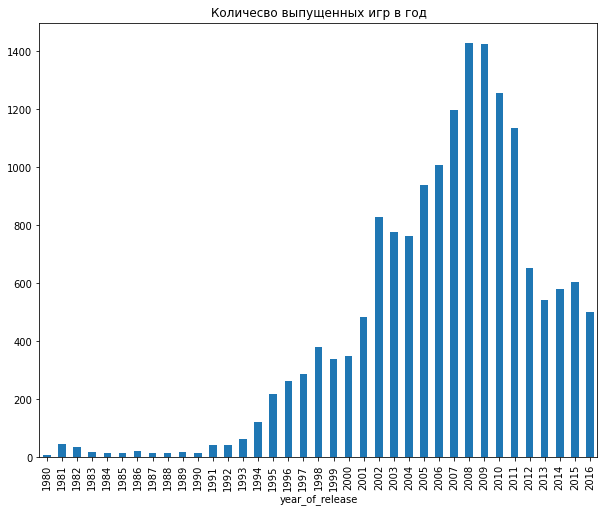

In [16]:
df_games.groupby('year_of_release')['year_of_release'].count().plot(kind='bar',figsize=fig_size)
plt.title('Количесво выпущенных игр в год')

На грайике виден стабильный рост количесва выпущенных игр в года начиная с 1990 и до 2010. С 2010 количесво выпущенных игр начинает снижаться.

Для анализа лучше брать период с 1995, когда игр в год становится более 200. Так выборка для каждого года будет достаточно большой.

**Продажи по платформам**

Посмотрим суммарные продажи по платформам за все время:

Text(0, 0.5, 'Platform name')

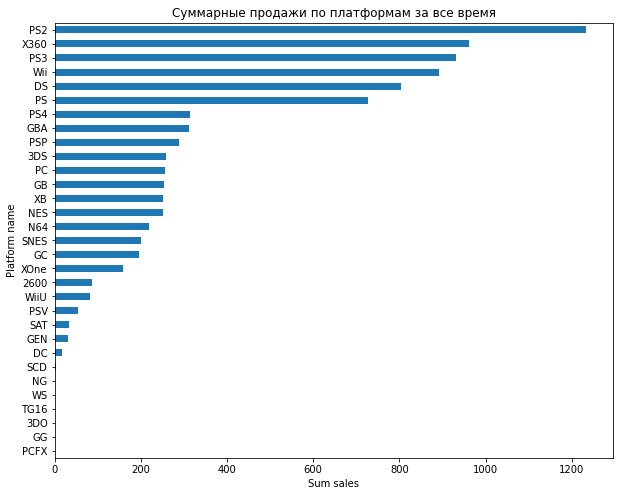

In [17]:
df_games.groupby('platform')['sum_sales'].sum().sort_values() \
        .plot(kind='barh',figsize=fig_size)

plt.title("Cуммарные продажи по платформам за все время")
plt.xlabel("Sum sales")
plt.ylabel("Platform name")

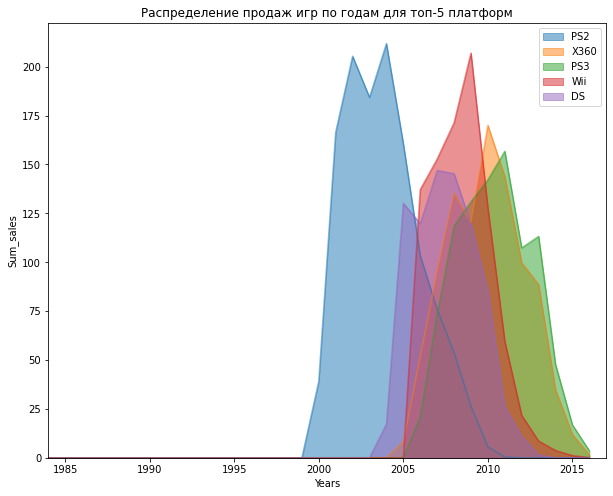

In [18]:
# Функция создает датафрейм из N платформ с самыми крупными суммарными продажами
# и рисует столбчатую диаграмму по годам
def top_platforms(n):
    df_platform = df_games.groupby('platform')['sum_sales'].sum().sort_values(ascending=False)
    
    # создаем лист с платфрмами и годами
    platforms = list(df_platform.head(n).index)
    years = list(df_games['year_of_release'].sort_values().unique())
    
    plat_years = df_games.groupby(['platform','year_of_release'])['sum_sales'].sum()
    
    # создаем датафрейм с нулями
    plotdata = pd.DataFrame(0, index=years, columns=platforms)
    
    # заполняем датафрейм
    for plat in platforms:
        plotdata[plat] = plat_years[plat]
        
    # удаляем строки, если все NaN
    #plotdata = plotdata.dropna(axis=0,how='all')

    #
    year_min = 3000
    year_max = 0
    for plat in platforms:
        year_list = np.array(plotdata[plotdata[plat].isna() == False].index)
        if year_min > year_list.min():
            year_min = year_list.min()
        if year_max < year_list.max():
            year_max = year_list.max()
    
    #  рисуем график по годам
    plotdata.plot(kind='area',stacked=False,figsize=fig_size)
    
    plt.xlim(year_min-1,year_max+1)
    plt.title("Распределение продаж игр по годам для топ-%i платформ" %n)
    plt.xlabel("Years")
    plt.ylabel("Sum_sales")

top_platforms(5)

In [19]:
df_games.query('platform == "DS"').sort_values(by='year_of_release').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.00,0.00,0.02,0.0,NaN,NaN,unknown,0.02
13463,Cocoto Kart Racer,DS,2004,Racing,0.04,0.00,0.00,0.0,NaN,NaN,E,0.04
11517,Kenshuui Tendo Dokuta,DS,2004,Simulation,0.00,0.00,0.08,0.0,NaN,NaN,unknown,0.08
4421,The Urbz: Sims in the City (all regions sales),DS,2004,Simulation,0.40,0.01,0.02,0.0,NaN,NaN,unknown,0.43
7902,Daigasso! Band Brothers,DS,2004,Misc,0.00,0.00,0.19,0.0,NaN,NaN,unknown,0.19


In [20]:
df_games.drop(df_games[df_games['name'] == 'Strongest Tokyo University Shogi DS'].index, inplace=True)
df_games.query('platform == "DS"').sort_values(by='year_of_release').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
4421,The Urbz: Sims in the City (all regions sales),DS,2004,Simulation,0.40,0.01,0.02,0.00,NaN,NaN,unknown,0.43
13095,Tennis no Oji-Sama: 2005 Crystal Drive,DS,2004,Sports,0.00,0.00,0.05,0.00,NaN,NaN,unknown,0.05
11517,Kenshuui Tendo Dokuta,DS,2004,Simulation,0.00,0.00,0.08,0.00,NaN,NaN,unknown,0.08
6580,Polarium,DS,2004,Puzzle,0.13,0.01,0.11,0.01,73.0,8.4,E,0.26
14161,Puyo Pop Fever(us sales),DS,2004,Puzzle,0.03,0.00,0.00,0.00,NaN,NaN,unknown,0.03


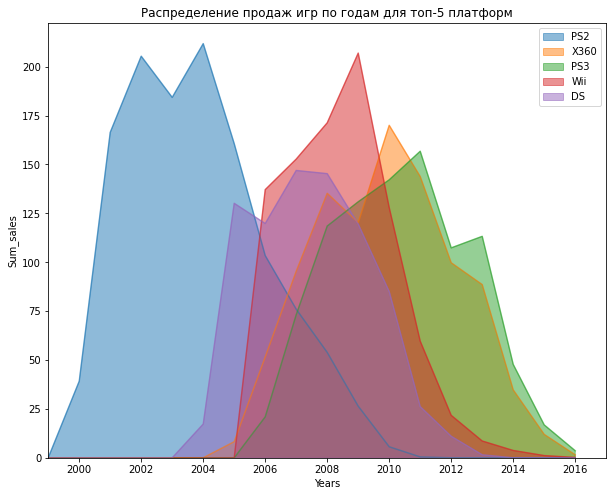

In [21]:
top_platforms(5)

Цикл популярности игровых платформ имеет фазу роста, фазу относительно стабильной популярности и фазу падения.
Примерный цикл жизни платформы составляет около 10 лет.

## Прогноз на 2017 год
<a id="id_2017_prediction"></a>

Возьмем все платформы у который за 2015 и 2016 год были продажи. Все остальные удаляем, так как пик их популярности уже прошел и они уже не принесут прибыли. Так как цикл жизни составляет около 10 лет, возьмем данные с 2012 года. Этого хватит чтобы оценить в какой стадии цикла платформа и делать какие-либо прогнозы.

In [22]:
start_period = 2012

In [23]:
# создаем лист с платфрмами и годами
platforms = list(df_games['platform'].sort_values().unique())
years = list(range(start_period,2017))
    
plat_years = df_games.groupby(['platform','year_of_release'])['sum_sales'].sum()
    
plotdata = pd.DataFrame(0, index=years, columns=platforms)
    
for plat in platforms:
    plotdata[plat] = plat_years[plat]
    
for plat in platforms:
    if ( np.isnan(plotdata[plat][2015])==True &
         np.isnan(plotdata[plat][2016])==True ):
        plotdata = plotdata.drop(columns=plat,axis=1)

display(plotdata)

,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
2012,51.36,23.22,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN
2013,56.57,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


Посмотрим на график выбранных платформ

Text(0, 0.5, 'Sum_sales')

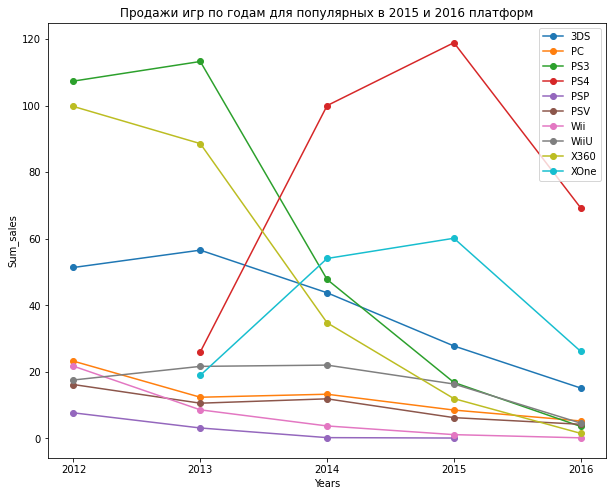

In [24]:
plotdata.plot(kind='line',marker="o",figsize=fig_size)
plt.title("Продажи игр по годам для популярных в 2015 и 2016 платформ")
plt.xticks(np.arange(plotdata.index.min(), plotdata.index.max()+1, 1))
plt.xlabel("Years")
plt.ylabel("Sum_sales")


Из графика видно, что продажи для всех платформ снижаются. Возможно игры становятся менее популярными или должны проявится принципиально новые платформы.

Выберем потенциально прибыльные платформы на 2017 год. Так как продажи снижаются для всех платформ, выберем те, у которых продажи за 2016 год самые высокие:

In [25]:
plotdata.loc[2016].sort_values(ascending=False)

PS4     69.25
XOne    26.15
3DS     15.14
PC       5.25
WiiU     4.60
PSV      4.25
PS3      3.60
X360     1.52
Wii      0.18
PSP       NaN
Name: 2016, dtype: float64

По продажам лидируют платформы:
- PS4
- XOne
- 3DS

Однако все платформы уже прошли пик своей популярности и их продажи падают.

Эти же платформы можно назвать потенциально прибыльными на 2017.

Далее требуется работ только с данными за актуальный период, поэтому выделим их в отдельный датафрейм для удобства.


In [26]:
df_games_actual = df_games.query('year_of_release >= @start_period')
df_games_actual.groupby('platform')['sum_sales'].sum().sort_values(ascending = False)

platform
PS4     314.14
PS3     288.79
X360    236.54
3DS     194.61
XOne    159.32
WiiU     82.19
PC       62.65
PSV      49.18
Wii      35.37
DS       12.55
PSP      11.19
Name: sum_sales, dtype: float64

**График «ящик с усами» по глобальным продажам игр в разбивке по платформам**

Возьмем платформы с самыми крупными продажами за актуальный период (2012-2016):  PS4, PS3, X360, 3DS, XOne, WiiU. И посмотрим как варьировались продажи. Для этого построим boxplot.

In [27]:
platforms = ['PS4','PS3', 'X360', '3DS', 'XOne', 'WiiU']
df_games_actual = df_games_actual.query("platform in @platforms")

In [28]:
# df_games_actual.plot(kind='box',column='sum_sales',by='platform',figsize=fig_size,grid=True)
# plt.title("Диаграмма размаха продаж для наиболее популярных платформ")

Text(0.5, 1.0, 'Диаграмма размаха продаж для наиболее популярных платформ')

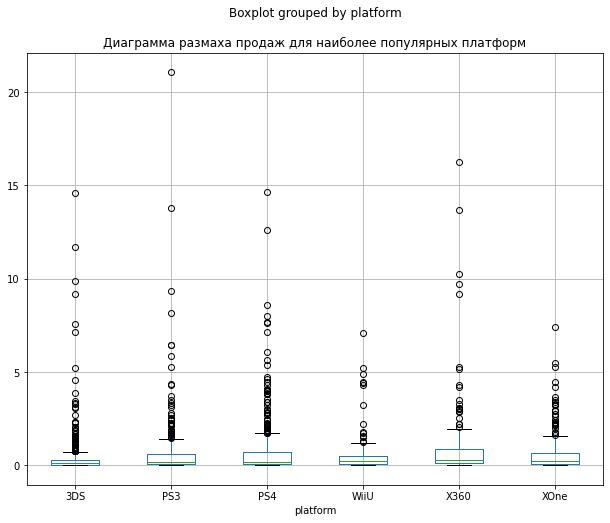

In [29]:
# код ревьюера
df_games_actual.boxplot(column='sum_sales',by='platform',figsize=fig_size,grid=True)
plt.title("Диаграмма размаха продаж для наиболее популярных платформ")

Выбросов много и они большие. Изменим диапазон, чтобы стал виден размах и медианные значения.

Text(0.5, 1.0, 'Диаграмма размаха продаж для наиболее популярных платформ')

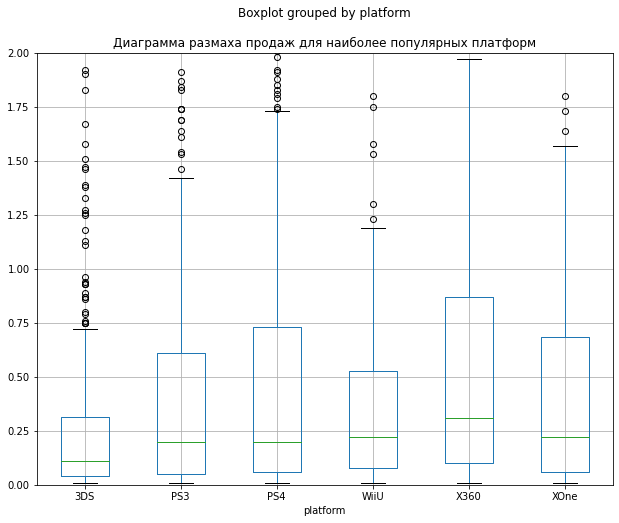

In [30]:
df_games_actual.boxplot(column='sum_sales',by='platform',figsize=fig_size,grid=True)
plt.ylim(0, 2)
plt.title("Диаграмма размаха продаж для наиболее популярных платформ")

В среднем медианное значение продаж находится около 0.25, за исключением 3DS (около 0.1), следовательно большая часть игр не пользуется популярностью. При этом достаточно много выбросов, что говорит о достаточном количесве игр с популярностью выше среднего.

#### **Влияние отзывов пользователей и критиков на продажи внутри одной популярной платформы**

Возьмем платформу PS4 как самую популярную в указанном периоде.

In [31]:
score_sales_corr = df_games_actual[ (df_games_actual['platform'] == 'PS4') &
                                    (df_games_actual['critic_score'].isna()==False) & 
                                    (df_games_actual['user_score'].isna()==False)][['critic_score','user_score','sum_sales']]

In [32]:
score_sales_corr.corr()

,critic_score,user_score,sum_sales
critic_score,1.000000,0.557654,0.405895
user_score,0.557654,1.000000,-0.033625
sum_sales,0.405895,-0.033625,1.000000


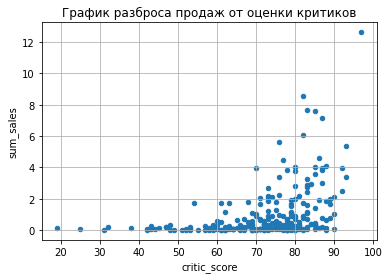

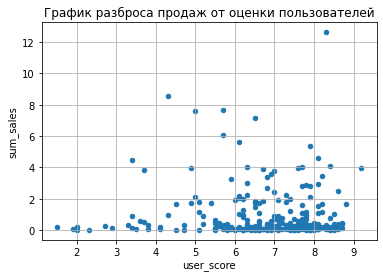

In [33]:
score_sales_corr.plot(x='critic_score',
                      y='sum_sales',
                      kind='scatter',
                      grid=True)
plt.title('График разброса продаж от оценки критиков')

plt.show()

score_sales_corr.plot(x='user_score',
                      y='sum_sales',
                      kind='scatter',
                      grid=True)
plt.title('График разброса продаж от оценки пользователей')

plt.show()

Наблюдается положительная зависимость продаж от оценки критиков (corr=0.40), а вот оценки пользователей не влияют на продажи - коэффициент корреляции близок к 0. 

In [34]:
df_games_actual[ (df_games_actual['platform'] == 'PS3') &
                 (df_games_actual['critic_score'].isna()==False) & 
                 (df_games_actual['user_score'].isna()==False)][['critic_score','user_score','sum_sales']] \
               .corr()

,critic_score,user_score,sum_sales
critic_score,1.000000,0.539456,0.331057
user_score,0.539456,1.000000,0.003227
sum_sales,0.331057,0.003227,1.000000


In [35]:
df_games_actual[ (df_games_actual['platform'] == 'X360') & 
                 (df_games_actual['critic_score'].isna()==False) & 
                 (df_games_actual['user_score'].isna()==False)][['critic_score','user_score','sum_sales']] \
               .corr()

,critic_score,user_score,sum_sales
critic_score,1.000000,0.557352,0.360573
user_score,0.557352,1.000000,-0.002014
sum_sales,0.360573,-0.002014,1.000000


In [36]:
df_games_actual[ (df_games_actual['platform'] == '3DS') &
                 (df_games_actual['critic_score'].isna()==False) & 
                 (df_games_actual['user_score'].isna()==False)][['critic_score','user_score','sum_sales']] \
               .corr()

,critic_score,user_score,sum_sales
critic_score,1.000000,0.722762,0.310553
user_score,0.722762,1.000000,0.201813
sum_sales,0.310553,0.201813,1.000000


In [37]:
df_games_actual[ (df_games_actual['platform'] == 'XOne') &
                 (df_games_actual['critic_score'].isna()==False) & 
                 (df_games_actual['user_score'].isna()==False)][['critic_score','user_score','sum_sales']] \
               .corr()

,critic_score,user_score,sum_sales
critic_score,1.000000,0.472462,0.410422
user_score,0.472462,1.000000,-0.094003
sum_sales,0.410422,-0.094003,1.000000


In [38]:
df_games_actual[ (df_games_actual['platform'] == 'WiiU') &
                 (df_games_actual['critic_score'].isna()==False) & 
                 (df_games_actual['user_score'].isna()==False)][['critic_score','user_score','sum_sales']] \
               .corr()

,critic_score,user_score,sum_sales
critic_score,1.000000,0.770080,0.350882
user_score,0.770080,1.000000,0.391848
sum_sales,0.350882,0.391848,1.000000


Для всех шести топовых игровых платформ наблюдается положительная зависимость продаж от оценки критиков с уровнем корреляци 0.3-0.4. В то время как оценки пользователей не влияют на продажи игр. Коэффициетн корреляции продаж  с оценкой пользователей около нуля.

**Зависимость продаж от жанра игры**



In [39]:
df_games_actual.groupby('genre')['sum_sales'].count().sort_values(ascending=False)

genre
Action          721
Role-Playing    226
Sports          211
Shooter         190
Misc            138
Adventure       136
Fighting         88
Racing           85
Platform         70
Simulation       50
Strategy         33
Puzzle           19
Name: sum_sales, dtype: int64

In [40]:
df_games_actual.groupby('genre')['sum_sales'].sum().sort_values(ascending=False)

genre
Action          395.32
Shooter         288.12
Sports          170.97
Role-Playing    154.15
Misc             61.24
Platform         55.66
Racing           50.05
Fighting         41.80
Simulation       25.36
Adventure        22.85
Strategy          6.03
Puzzle            4.04
Name: sum_sales, dtype: float64

Набольшее количесво игр в 2012-2016гг. выпускается в жанрах 'action','role-playing' и 'sports'. В рейтенге продаж 'action','sports' сохраняют свои позиции, а вот на второе место по продажам выходит жанр 'shooter', что говорит в среднем больших продажах каждой отдельной игры в этом жанре. Посмортим на диаграмму размаха по жанрам

Text(0.5, 1.0, 'Диаграмма размаха продаж для разных жанров')

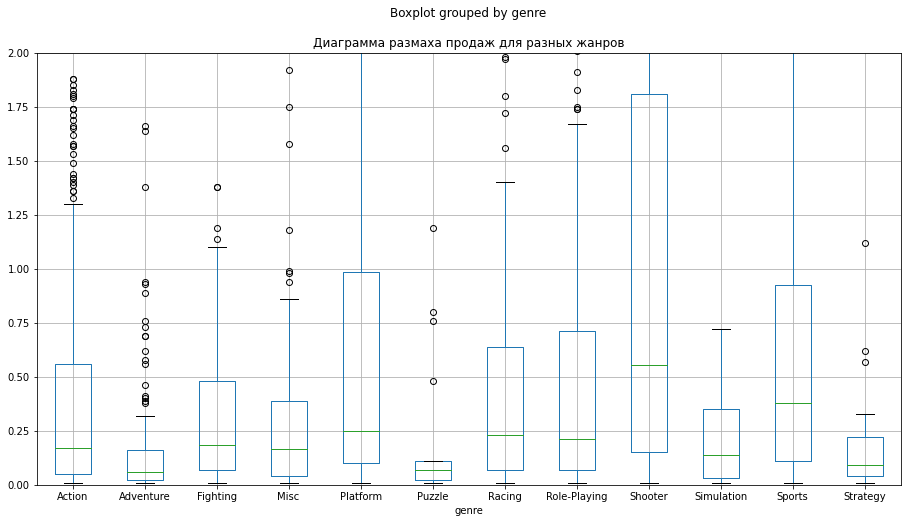

In [41]:
df_games_actual.boxplot(column='sum_sales',by='genre',figsize=(15,8),grid=True)
plt.ylim(0, 2)
plt.title("Диаграмма размаха продаж для разных жанров")

In [42]:
df_games_actual.groupby('genre')['sum_sales'].median().sort_values(ascending=False)

genre
Shooter         0.555
Sports          0.380
Platform        0.250
Racing          0.230
Role-Playing    0.210
Fighting        0.185
Action          0.170
Misc            0.165
Simulation      0.140
Strategy        0.090
Puzzle          0.070
Adventure       0.060
Name: sum_sales, dtype: float64

Наибольшие медианные продажи у жанра 'Shooter'. Далее по медианным продажам идут жанры 'Sports','Platform', 'Racing', что всвязи с количесвом выпускаемых игр в каждом жанре дает лидеров по суммарным прдажам -- 'action', 'shooter' и 'sports'.

### Вывод

Исследовательский анализ данных показал:

- Примерный цикл жизни платформы составляет около 10 лет. Цикл имеет фазу роста, фазу относительно стабильной популярности и фазу падения.
- Продажи для всех платформ снижаются. Возможно игры становятся менее популярными или должны проявится принципиально новые платформы.
- Потенциально прибыльные платформы на 2017 год:
  - PS4
  - XOne
  - 3DS
- Для шести самых популярных платформ, медианное значение продаж находится около 0.25, за исключением 3DS (около 0.1). При этом достаточно много выбросов, что говорит о достаточном количесве игр с популярностью выше среднего. 
- наблюдается положительная зависимость продаж от оценки критиков с уровнем корреляци 0.3-0.4. В то время как оценки пользователей не влияют на продажи игр с уровнем корреляци около нуля.
- Набольшее количесво игр выпускается в жанрах 'action','role-playind' и 'sports'. 
- Набольшее количесво игр продается в жанрах 'action','shooter' и 'sports'.
<font color='Blue'>
- По медианным продажам, лидируют игры в жанрах shooter', 'sports' и 'platform'
</font>

## Портрет пользователя каждого региона
<a id="id_user_profile"></a>
   
**Топ-5 популярных платформ**

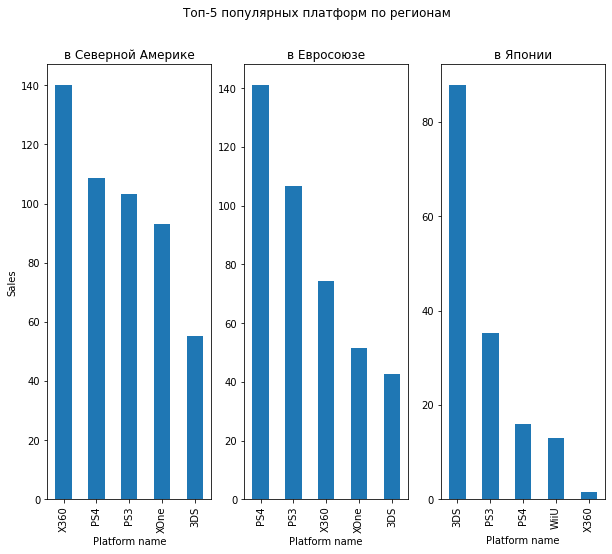

In [43]:
n=5

plt.subplot(1,3,1)
df_games_actual.groupby('platform')['na_sales'].sum().sort_values(ascending=False)[:n] \
               .plot(kind='bar',figsize=fig_size)
plt.title('в Северной Америке')
plt.ylabel("Sales")
plt.xlabel("Platform name")

plt.subplot(1,3,2)
df_games_actual.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)[:n] \
               .plot(kind='bar',figsize=fig_size)
plt.title('в Евросоюзе')
plt.xlabel("Platform name")

plt.subplot(1,3,3)
df_games_actual.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)[:n] \
               .plot(kind='bar',figsize=fig_size)
plt.title('в Японии')
plt.xlabel("Platform name")

plt.suptitle(f'Топ-{n} популярных платформ по регионам')
plt.show()

Рейтинг топ-5 платформ для Америки и Европы похож -- в нем представлены одинаковые платформы. Различие в местах, которые они занимают в конкретном рейтенге, и то только для тройки лидеров. Так в Америке лидером является X360, а в Европе PS4.

Рейтинг в Японии отличается от других регионов: 
- во-первых в топ-5 вошла платформа WiiU, которой нет ни в американском, ни в европейском топ-5, 
- во-вторых первое место в японском рейтенге занимает 3DS, которая находится на 5 месте в рейтенгах других регионов.

**Топ-5 популярных жанров**

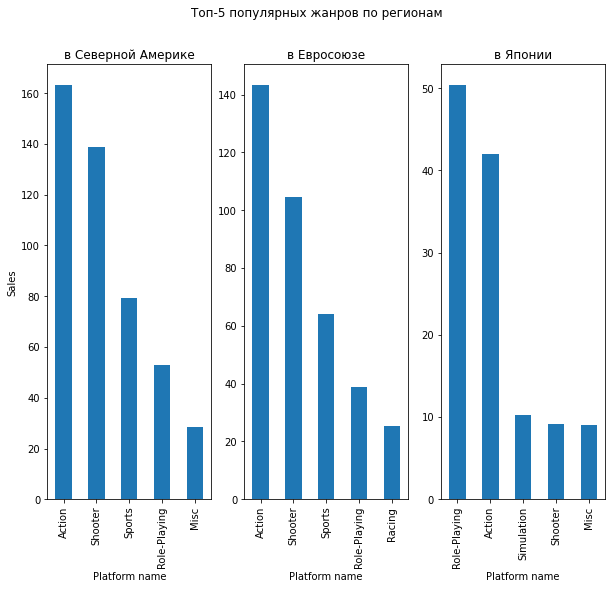

In [44]:
n=5

plt.subplot(1,3,1)
df_games_actual.groupby('genre')['na_sales'].sum().sort_values(ascending=False)[:n] \
               .plot(kind='bar',figsize=fig_size)
plt.title('в Северной Америке')
plt.ylabel("Sales")
plt.xlabel("Platform name")

plt.subplot(1,3,2)
df_games_actual.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)[:n] \
               .plot(kind='bar',figsize=fig_size)
plt.title('в Евросоюзе')
plt.xlabel("Platform name")

plt.subplot(1,3,3)
df_games_actual.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)[:n] \
               .plot(kind='bar',figsize=fig_size)
plt.title('в Японии')
plt.xlabel("Platform name")

plt.suptitle(f'Топ-{n} популярных жанров по регионам')
plt.show()

В рейтенге по жанрам похожая картина как и в рейтенге по платформам. Рейтинг топ-5 жанров для Америки и Европы похожи -- первые четыре позиции абсолютно одниковые, отличается только пятая позиция. В тройке лидеров для Америки и Европы:

 1. 'action'
 2. 'shooter'
 3. 'sports' 
 
А вот в Японии первое место достается 'Role-Playing'. Затем идет 'action', далее с большим провалом следуют 'simulation', 'shooter' и 'misc'.  Жанра 'simulation' встречается только в японском рейтенге.


**Влияние рейтинга ESRB на продажи в отдельном регионе**

In [45]:
# таблица популярности игр в зависимости от рейтинга ESRB.
# популярность в долях от суммарных продаж по региону
df_group = df_games_actual.groupby('rating')[['na_sales','eu_sales','jp_sales']].sum()
df_group = df_group/df_group.sum() 
df_group

,na_sales,eu_sales,jp_sales
rating,,,
E,0.201931,0.230564,0.173032
E10+,0.110989,0.095580,0.049169
M,0.401151,0.393952,0.125032
T,0.108186,0.097866,0.129774
unknown,0.177743,0.182038,0.522993


Text(0.5, 1.0, 'Heatmap популярности игр в зависимости от рейтинга ESRB')

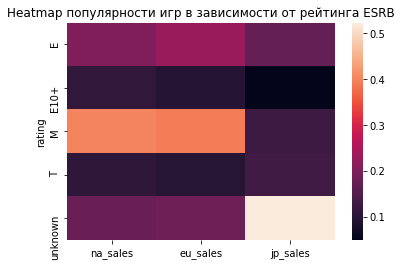

In [46]:
sns.heatmap(df_group)
plt.title('Heatmap популярности игр в зависимости от рейтинга ESRB')

В Америке и Европе наибольшей популярность пользуются игры с рейтингом M, затем идут игры с рейтингом E и большая доля игр с неизвестным рейтингом. В Японии в оснвном популярны игры, для которых рейтинг ESRB не известен.

### Вывод

Портреты пользователя из европейского и американского регионов похожи:
- популярные платформы 'PS4', 'PS3', 'X360', 'XOne', и '3DS'
- популярыне жанры 'action', 'shooter', 'sports'
- популярны игры с рейтингом M, E и неизвестным рейтингом.

Потртет пользователя из Японии сильно отличается:
- популярные платформы '3DS', 'PS3', 'PS4', 'WiiU' и 'X360'
- популярыне жанры 'Role-Playing'и 'action' (с большим отрывом), затем идут 'simulation' и 'shooter'
- популярны игры, для которых рейтинга ESRB не известен


## Проверка гипотез
<a id="id_hypotises_cheking"></a>

В исследовании требуется проверить следующие гипотезы:

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
- Задайте самостоятельно пороговое значение alpha.

Нулевая гипотеза формулируется с использованием знака равенства, поэтому нулевая и альтернативная гипотезы будут звучать следующим образом:

- H_0: средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- H_a: средние пользовательские рейтинги платформ Xbox One и PC не равны друг другу

И

- H_0: средние пользовательские рейтинги жанров Action и Sports равны друг другу
- H_a: средние пользовательские рейтинги жанров Action и Sports не равны друг другу



In [47]:
df_games_actual = df_games.query('year_of_release >= @start_period')

In [48]:
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

In [49]:
results = st.ttest_ind(
    df_games_actual[(df_games_actual['platform'] == 'XOne') & 
                    (df_games_actual['user_score'].isna() == False)]['user_score'], 
    df_games_actual[(df_games_actual['platform'] == 'PC') & 
                    (df_games_actual['user_score'].isna() == False)]['user_score'])

print('Средний пользвательский рейтинг Xbox One:', 
      df_games_actual[df_games_actual['platform'] == 'XOne']['user_score'].mean().round(2))
print('Средний пользвательский рейтинг PC:', 
      df_games_actual[df_games_actual['platform'] == 'PC']['user_score'].mean().round(2))
print('p-значение: ', results.pvalue)


if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

Средний пользвательский рейтинг Xbox One: 6.52
Средний пользвательский рейтинг PC: 6.43
p-значение:  0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


Значение p-value больше заданного порога, мы не можем отвергнуть нулевую гипотезу.

Вывод: средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Пользователи в среднем одинаково оценивают Xbox One и PC.



**Средние пользовательские рейтинги жанров Action и Sports равны друг другу**

In [50]:
results = st.ttest_ind(
    df_games_actual[(df_games_actual['genre'] == 'Action') & 
                    (df_games_actual['user_score'].isna() == False)]['user_score'], 
    df_games_actual[(df_games_actual['genre'] == 'Sports') & 
                    (df_games_actual['user_score'].isna() == False)]['user_score'])

print('Средний пользвательский рейтинг игр жанра Action:', 
      df_games_actual[df_games_actual['genre'] == 'Action']['user_score'].mean().round(2))
print('Средний пользвательский рейтинг игр жанра Sports:',
      df_games_actual[df_games_actual['genre'] == 'Sports']['user_score'].mean().round(2))
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

Средний пользвательский рейтинг игр жанра Action: 6.83
Средний пользвательский рейтинг игр жанра Sports: 5.46
p-значение:  3.7163089460934874e-26
Отвергаем нулевую гипотезу


Значение p-value гораздо меньше заданного порога, поэтому отвергаем нулевую гипотезу.

Вывод: средние пользовательские рейтинги жанров Action и Sports различны. В среднем пользователи выше оценивают игры в жанре Action, чем Sport

### Вывод

Анализ показал,  различия между играми жанров Xbox One и PC нет. И там, и там средний пользовательский одинаков.

А вот средние пользовательские рейтинги  жанров Action и Sports различны. Пользователи в среднем оценивают Action  выше, чем Sport.

## Общий вывод
<a id="id_conclusion"></a>

В этом проекте были проанализированны данные по играм и игровым платформам с 1980 по 2016.


Анализ показал:

- Примерный цикл жизни платформы составляет около 10 лет. 
- На 2015 и 2016 продажи для всех платформ снижаются. Возможно игры становятся менее популярными.
- Потенциально прибыльные платформы на 2017 год:
  - PS4
  - XOne
  - 3DS
- Наблюдается положительная зависимость продаж от оценки критиков с уровнем корреляци и отсутствие корреляции с оценкой пользователей.
- Набольшее количесво игр выпускается в жанрах 'action','role-playind' и 'sports'. 
- Набольшее количесво игр продается в жанрах 'action','shooter' и 'sports'.
- По медианным продажам, лидируют игры в жанрах shooter', 'sports' и 'platform'

Были составлены портреты пользователей про регионам:

- Портреты пользователя из европейского и американского регионов похожи:
  - популярные платформы 'PS4', 'PS3', 'X360', 'XOne', и '3DS'
  - популярыне жанры 'action', 'shooter', 'sports'
  - популярны игры с рейтингом M, E и неизвестным рейтингом.

- Потртет пользователя из Японии сильно отличается:
  - популярные платформы '3DS', 'PS3', 'PS4', 'WiiU' и 'X360'
  - популярыне жанры 'Role-Playing'и 'action' (с большим отрывом), затем идут 'simulation' и 'shooter'
  - популярны игры, для которых рейтинга ESRB не известен

Так же анализ данных показал, что:
- Средние пользовательские рейтинги игр жанров Action и Sports отличаются. Пользователи в среднем оценивают Action выше, чем Sports.
- Различия между платформами Xbox One и PC нет. И там, и там средний пользовательский одинаков.
